# Question 3: Wisconsin Cancer


## Team Members:

#### Marcel Santos de Carvalho, id 79083
#### Loris Baudry, id 79794
#### Alex Palacios, id 73713

#### Responsible for this notebook: Loris Baudry

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# 1.- Data import

In [5]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

# 2.- Data Visualization and Analysis

## 2.1 Data Description

The Breast Cancer Dataset is comprised by 569 observations of 30 features and 2 labels. The classes are Malignant (0) and Bening (1). From the 30 features, all of them are numerical and there is no missing date in any of the features observations. Nonetheless, the scale of some features largly differs so we will standardize the features magnitude with the MinMax Scaling Method.  

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
x=pd.DataFrame(data.data)

In [8]:
x.shape

(569, 30)

In [9]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
x.columns=data.feature_names

In [12]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y=data.target

In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [15]:
print(data.target_names)

['malignant' 'benign']


In [16]:
types = []
for i in y:
    name = data['target_names'][i]
    types.append(name)

In [17]:
x['types'] = types

In [18]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,types
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [19]:
x.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,types
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


In [20]:
x.isna().count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
types                      569
dtype: int64

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2.1 Feature Standardadization

We chose 4 randome feautres to show the difference in the scale of the features and how the MinMa Scaling method helped us to fix that problem by replotting the rescaled features

C:\Users\apala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


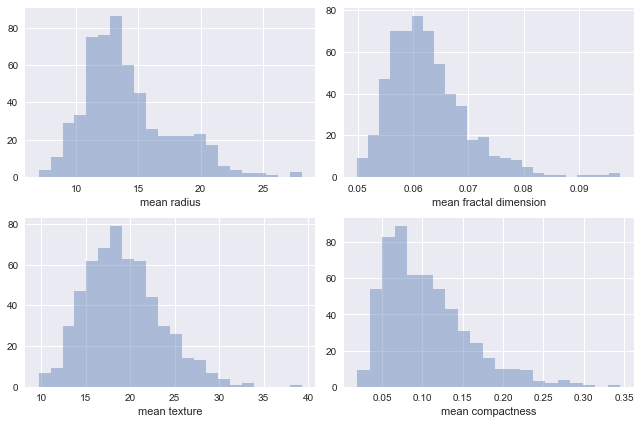

In [23]:
import seaborn as sns
x_hist = x[['mean radius', 'mean fractal dimension', 'mean texture', 'mean compactness']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in x_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

In [24]:
from sklearn.preprocessing import MinMaxScaler
x.iloc[:,0:-1] = MinMaxScaler().fit_transform(x.iloc[:,0:-1])

In [25]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,types
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,malignant
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,malignant
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,malignant
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,malignant
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,malignant


C:\Users\apala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


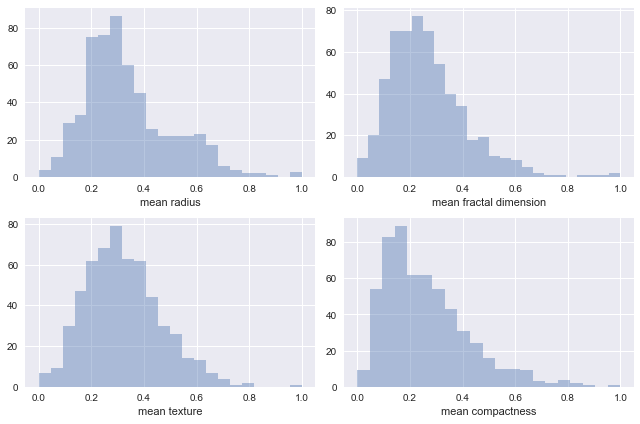

In [26]:
x_hist = x[['mean radius', 'mean fractal dimension', 'mean texture', 'mean compactness']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in x_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

In [27]:
#from sklearn.preprocessing import StandardScaler
#x.iloc[:,0:-1] = StandardScaler().fit_transform(x.iloc[:,0:-1])
#x["mean radius"].hist()

In [28]:
#x.head()

# 3.- Explanatory Power Analysis

## 3.1 Correlations Analysis and P-values

As part of the data analysis, we will look for hihgly correlated features as having multicollinearity implies that there might be some regressors not adding much information to the model. We will try to idenify those variables that seem not to have high explanatory power and to create a second sample set without them. For the remaining of the work we will do each analysis with two samples to compare the results

<AxesSubplot:>

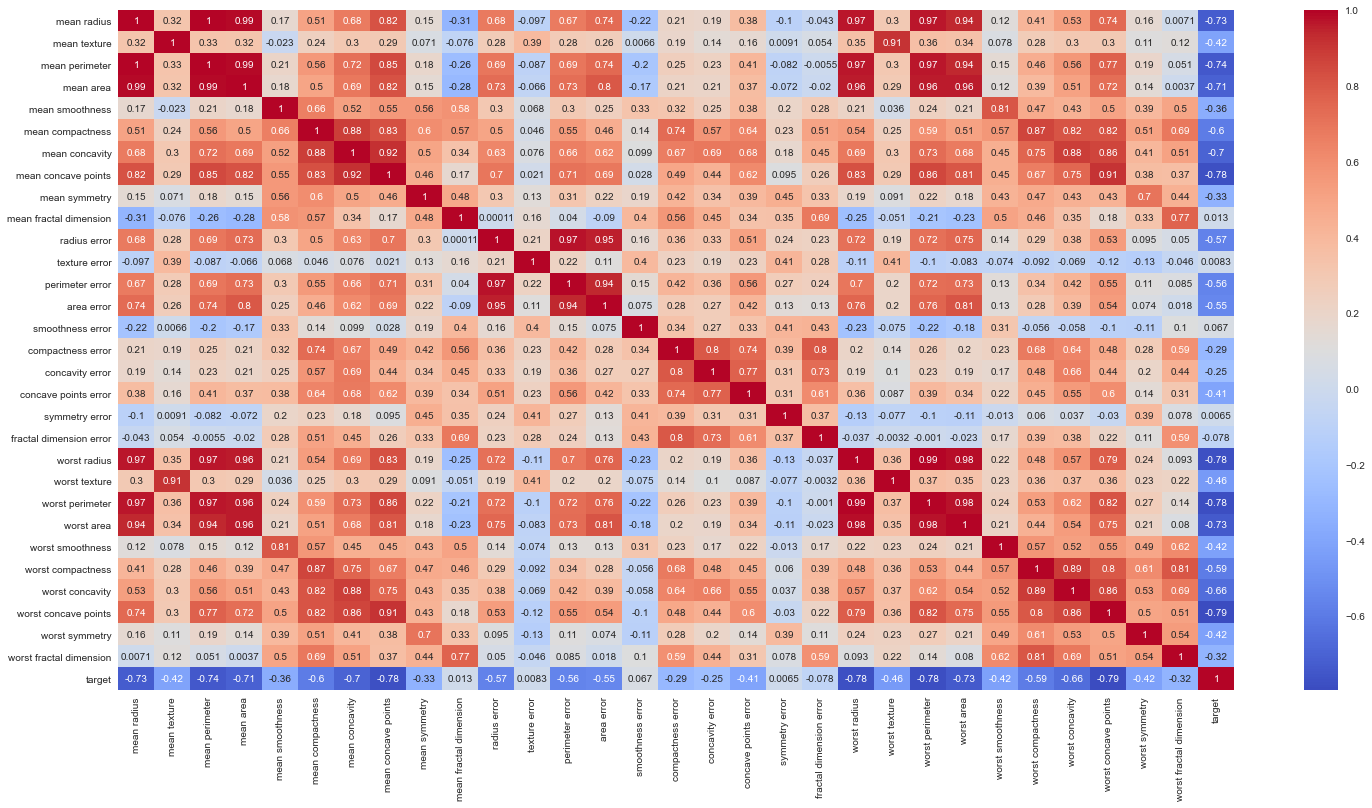

In [29]:
## Plot a correlation matrix to see the correlations between (i) features x label and (ii) features x features
x['target']=y
import seaborn as sns
corr = x.corr()
plt.figure(figsize=(25,12.5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the correlation matrix is easy to see that some variables are hihgly correlated and others have veyr low correlation regarding the targe variable:

    1.- Mean Perimeter, mean area, worst radius, worst perimeter and worst area are highly correlated with mean radius
    2.- Worst texture is highly correlated with mean texture
    3.- Mean concavity is highly correlated with mean concave points
    4.- Worst concave points is highly correlated with mean concave points
    5.- Perimeter error and area error are highly correlated with radius error
    6.- Perimeter error is highly correlate with area error
    7.- Worst perimeter and worst area are highly correlated with worst radius
    8.- Worst area is highly correlated with worst perimeter
    9.- Mean fractal dimension, texture error, smoothness error, symmetry error, fractal dimension error, have very low correlation with target.
    
 Let us see how the correlation matrix shows after removing the following features:
     - Mean concave points, mean texture, perimeter error, area error, worst perimeter, worst area, mean perimeter, mean area, worst radius, worst perimeter and worst area, mean fractal dimension, texture error, smoothness error, symmetry error, fractal dimension error 
    

In [30]:
x1=x.drop(["mean concave points", "mean texture", "perimeter error", "area error", "worst perimeter", "worst area", "mean perimeter", "mean area", "worst radius", "worst perimeter", "worst area", "mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"],axis=1)
x1.shape

(569, 18)

<AxesSubplot:>

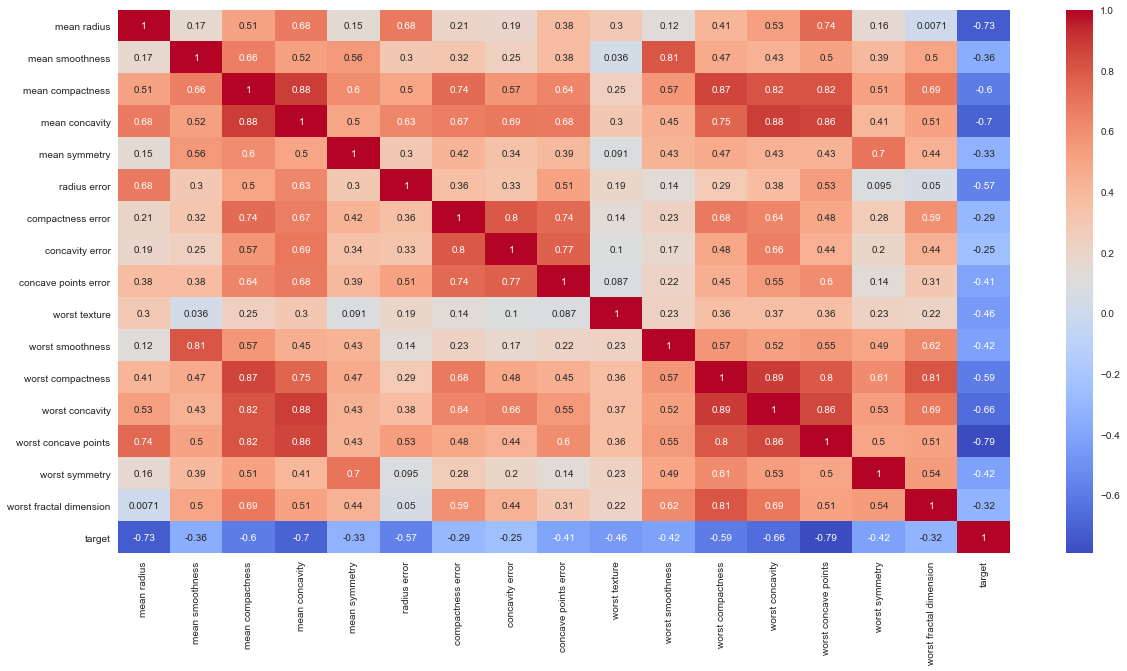

In [31]:
corr = x1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We also compute the p-values of the regressors. Noramlly, a p-value higher than 5% (the common significance level) means that the regressor coefficient is not statistically different from zero. In other words, you could erase that regressor. From the analysis below, it seems that "mean compactness", "concavity error", "worst area" and "worst radius" are the variables with the highest explanatory power. 

In [32]:
import statsmodels.api as sm
xt=x.drop(["types","target"],axis=1)
xt2= sm.add_constant(xt)
est = sm.OLS(y, xt2,hasconstant=True)
est2 = est.fit()
print(est2.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          6.05e-153
Time:                        08:36:11   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## 3.2 Features distribution by class

We will create a distribution plot to see how differentiated are each feature in term of the labels, this will also give us an idea of which features my have higher explanatory power such as mean perimeter. Even though, in the middle of the plot there is no celar difference between classes, this feature is clearly differentiated at the limits of the x-axis

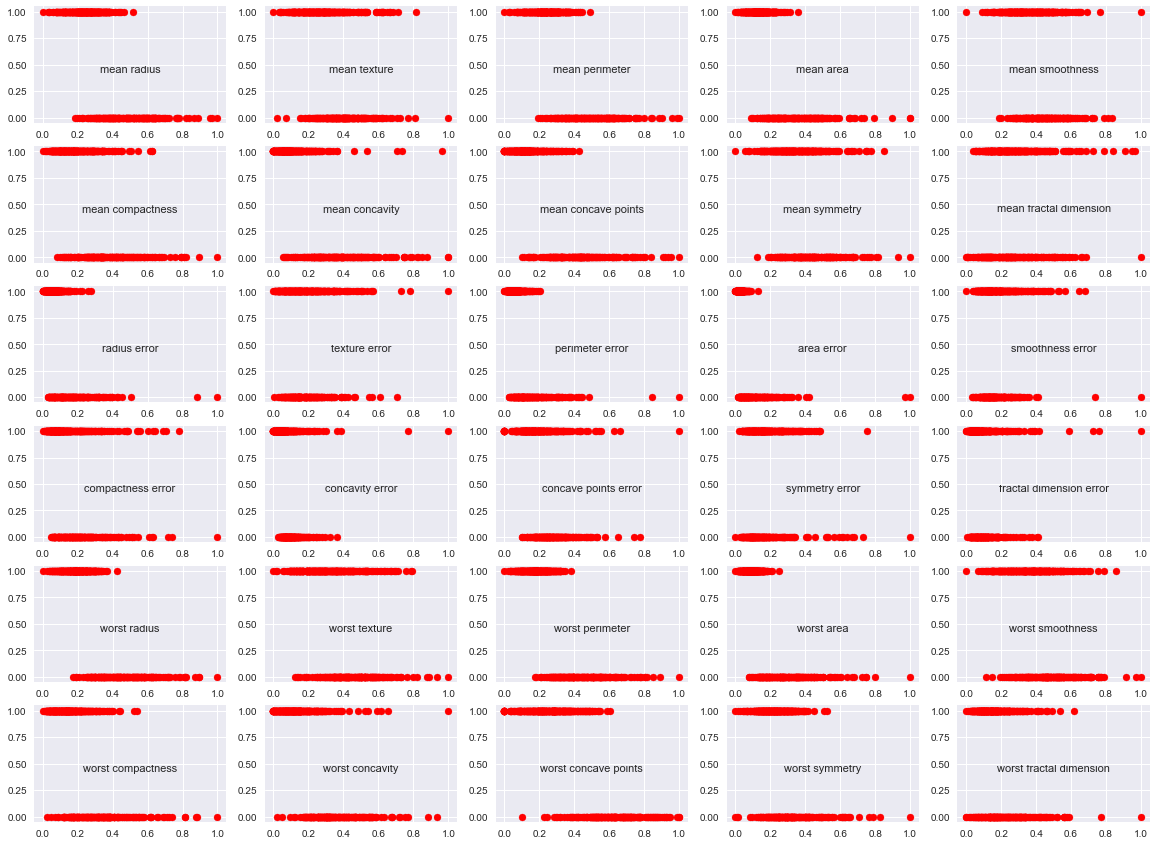

In [33]:
plt_idx = 1
plt.figure(figsize=(20, 15))

for index1 in range(0,30):
        f1 = x.columns[index1]
        xp = x[f1]
        plt.subplot(6,5,plt_idx,label=f1)
        plt.scatter(xp,y,c = 'red')
        plt.xlabel(f1,labelpad=-75)
        plt_idx = plt_idx+1

# 4.- Metrics for model evaluation 

For the model evaluation we will be using the next metrics:
    
$$Accuracy=\frac{TP+TN}{FP+FN+TP+TN}$$ 

    
$$Precision=\frac{TP}{TP+FP}$$    

    
$$Recall=\frac{TP}{TP+FN}$$    

    
$$F1=2\times\frac{Precision\times Recall}{Precision+Recall}$$

# 5.- Model Fitting

We will now fit different models to our data. We will apply each model twice. One for the original data and one for the second set in which we remove some variables. We will fit the model to a train set (70% of total data randomly selected) and then predict values for the rest 30%. The models we will aplly are Logistic Regression, K-Nearest Neighbor, Decision Tree and Supported Vector Machine

## 5.1 Logistic Regression

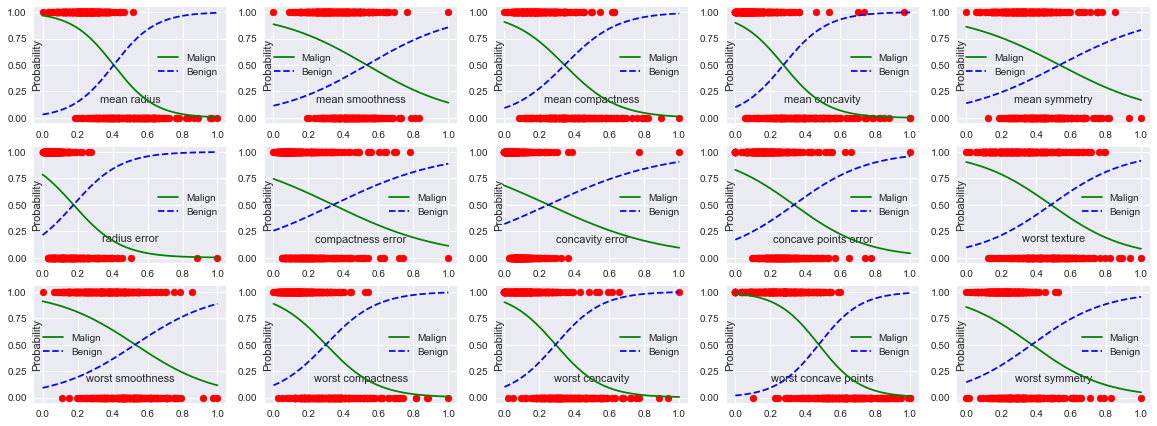

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
plt_idx = 1
plt.figure(figsize=(20, 15))

for index1 in range(0,15):
        f1 = x1.columns[index1]
        xp = x1[f1].values.reshape(569,1)
        log_reg.fit(xp,y)
        X_new = np.linspace(xp.min(),xp.max(),1000).reshape(-1,1)
        y_proba = log_reg.predict_proba(X_new)
        plt.subplot(6,5,plt_idx)
        plt.scatter(xp,y,c = 'red')
        plt.plot(X_new,y_proba[:,1],"g-",label="Malign",)
        plt.plot(X_new,y_proba[:,0],"b--",label="Benign")
        plt.xlabel(f1,labelpad=-45,loc='center')
        plt.ylabel('Probability',loc='center',labelpad=-35)
        plt.legend()
        plt_idx = plt_idx+1

After cleaning for high correlated variables, its easy to observe that some features do not have high explanatory power when isolated, as the classes ar not clearly differentiated. We will fit the model now with all the features at the same time.

We will define a function generation a confusion matrix, which has on the diagonal the correct prections to show graphically how well the model fit the data. Afterwards, there is a another function that we create so that the data are split between train and test set, the model is fit on the train set and the the metrics described before are applied to evaluate the model

In [35]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as mpl

def plot_cm(clf, X, y, labs):
    
    mpl.rcParams.update({'font.size': 16})
    cm = plot_confusion_matrix(clf, X, y, display_labels=labs,cmap=mpl.cm.Blues);

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def train(model, z, w):
    x_train, x_test, y_train, y_test = train_test_split(z, w, test_size=.30, random_state=999)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Model Report')
    print('Accuracy: ', np.around(accuracy_score(y_test, y_pred,normalize=True),4))
    print('Precision: ', np.around(precision_score(y_test, y_pred),4))
    print('Recall: ', np.around(recall_score(y_test, y_pred),4))
    print('f1: ', np.around(f1_score(y_test, y_pred),4))
    plot_cm(model, x_test, y_test, labs=('Bening', 'Malign'))

### 5.1.1 Logistic regression full sample

Model Report
Accuracy:  0.9532
Precision:  0.9245
Recall:  1.0
f1:  0.9608


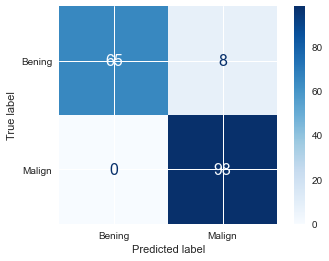

In [38]:
xt=x.drop(["types","target"],axis=1)
model = LogisticRegression(solver='liblinear')
train(model, xt, y)

### 5.1.2 Logistic regression subsample

Model Report
Accuracy:  0.9415
Precision:  0.9074
Recall:  1.0
f1:  0.9515


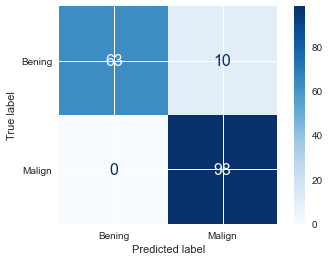

In [40]:
xt=x1.drop(["types","target"],axis=1)
model = LogisticRegression(solver='liblinear')
train(model, xt, y)

The results actually worsen after removing the selected variables, although not by much.

## 5.2 K-Nearest Neighbor

### 5.2.1 K-Nearest Neighbor full sample

In [41]:
from sklearn.neighbors import KNeighborsClassifier

Model Report
Accuracy:  0.9766
Precision:  0.97
Recall:  0.9898
f1:  0.9798


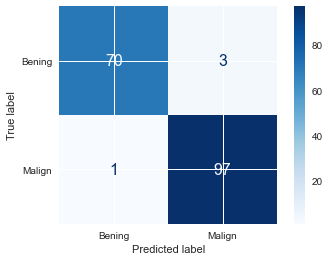

In [42]:
K=3
model = KNeighborsClassifier(K,p=2)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

#### 5.2.1.2 K variation analysis

We will see how the accuracy of our prediction changes as we vary the number of neighbors taken to fit the model

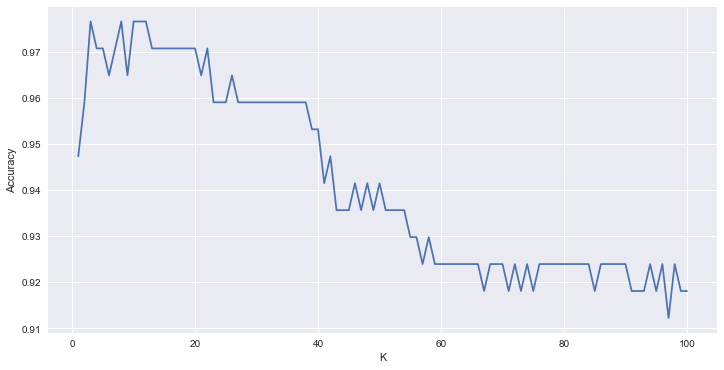

In [43]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

#### 5.2.1.2 Check Analysis
Is easy to see that when K=3 we reach the highest accuracy. We will now see how the graph changes when wee change the method to measure the distance. The first method used above was the Euclidean method (p=2). Now we will use the Manhattan method (p=1). Finally, we decided to use the Manhattan method as it reaches the highest accuracy. Now, we will corroborate that accuracy decays as k increases by fittign the model for different ks

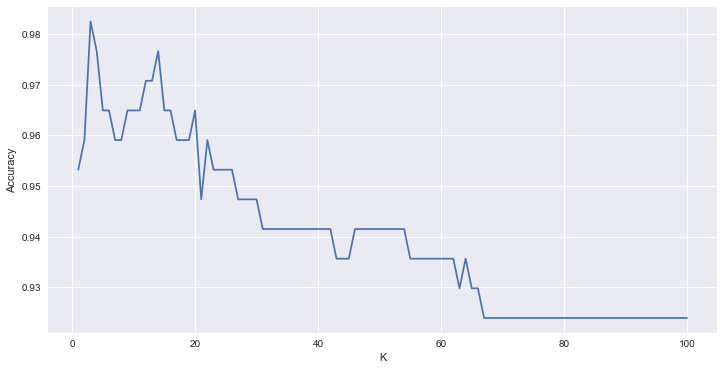

In [44]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

Model Report
Accuracy:  0.9825
Precision:  0.9703
Recall:  1.0
f1:  0.9849


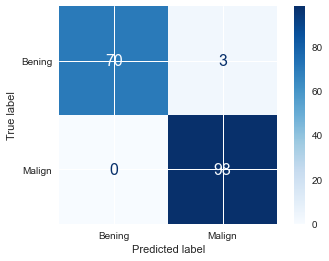

In [45]:
K=3
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9766
Precision:  0.97
Recall:  0.9898
f1:  0.9798


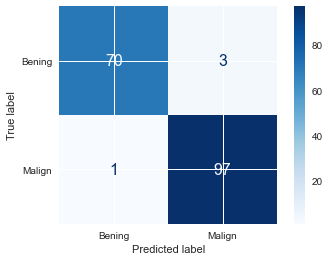

In [47]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.924
Precision:  0.8829
Recall:  1.0
f1:  0.9378


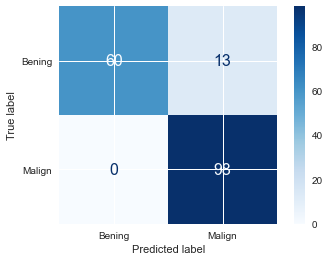

In [48]:
K=70
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

### 5.2.2 K-Nearest Neighbor subsample

Model Report
Accuracy:  0.9474
Precision:  0.9406
Recall:  0.9694
f1:  0.9548


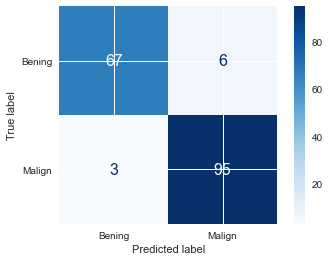

In [49]:
K=3
model = KNeighborsClassifier(K,p=2)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

#### 5.2.2.2 K variation analysis

We will see again how the accuracy of our prediction changes as we vary the number of neighbors taken to fit the model

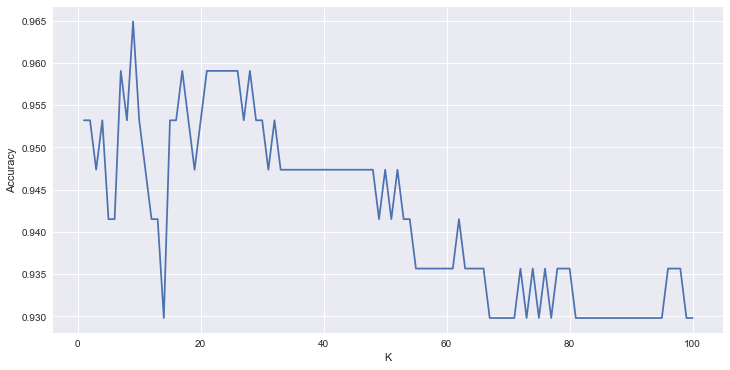

In [50]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x1.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

#### 5.2.1.2 Check Analysis
In this case, when K=3 we reach again the highest accuracy. We will repeat the same step before to seehow the graph changes when we change the method to measure the distance. In this case, we decided again to use the Manhattan method as it reaches the highest accuracy. Now, we will corroborate that accuracy decays as k increases by fittign the model for different ks

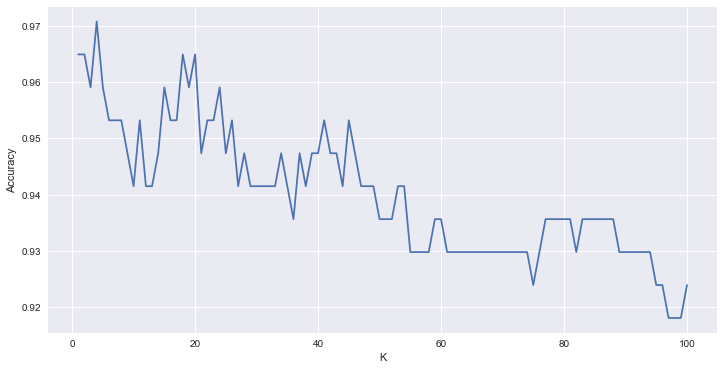

In [51]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x1.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

Model Report
Accuracy:  0.9649
Precision:  0.96
Recall:  0.9796
f1:  0.9697


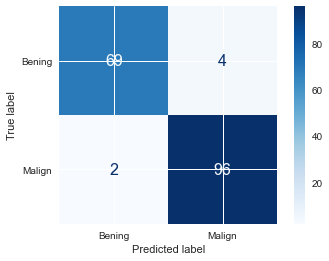

In [52]:
K=1
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9708
Precision:  0.9604
Recall:  0.9898
f1:  0.9749


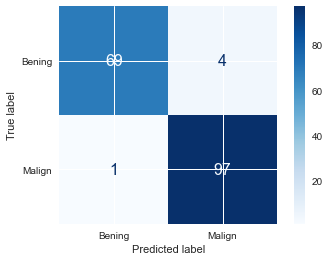

In [53]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9298
Precision:  0.8981
Recall:  0.9898
f1:  0.9417


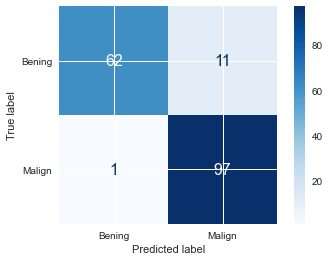

In [54]:
K=70
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Similarly as the logistic regression case, the metrics worsen after removing the selected variables but not in a significant way

## 5.3 Decision Tree

We will now fit the Decision Tree model, setting a maximum depth of ramifications. 

In [55]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### 5.3.1 Decision Tree full sample

As we can see, all the final leafs have gini meausres equal to 0 meaning that the model has exactly fitted the data

Model Report
Accuracy:  0.924
Precision:  0.9126
Recall:  0.9592
f1:  0.9353


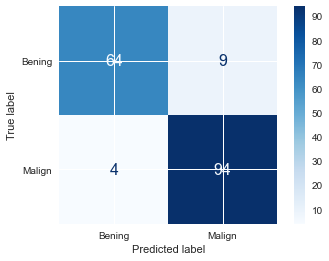

In [57]:
model = DecisionTreeClassifier(random_state=235, max_depth=10)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

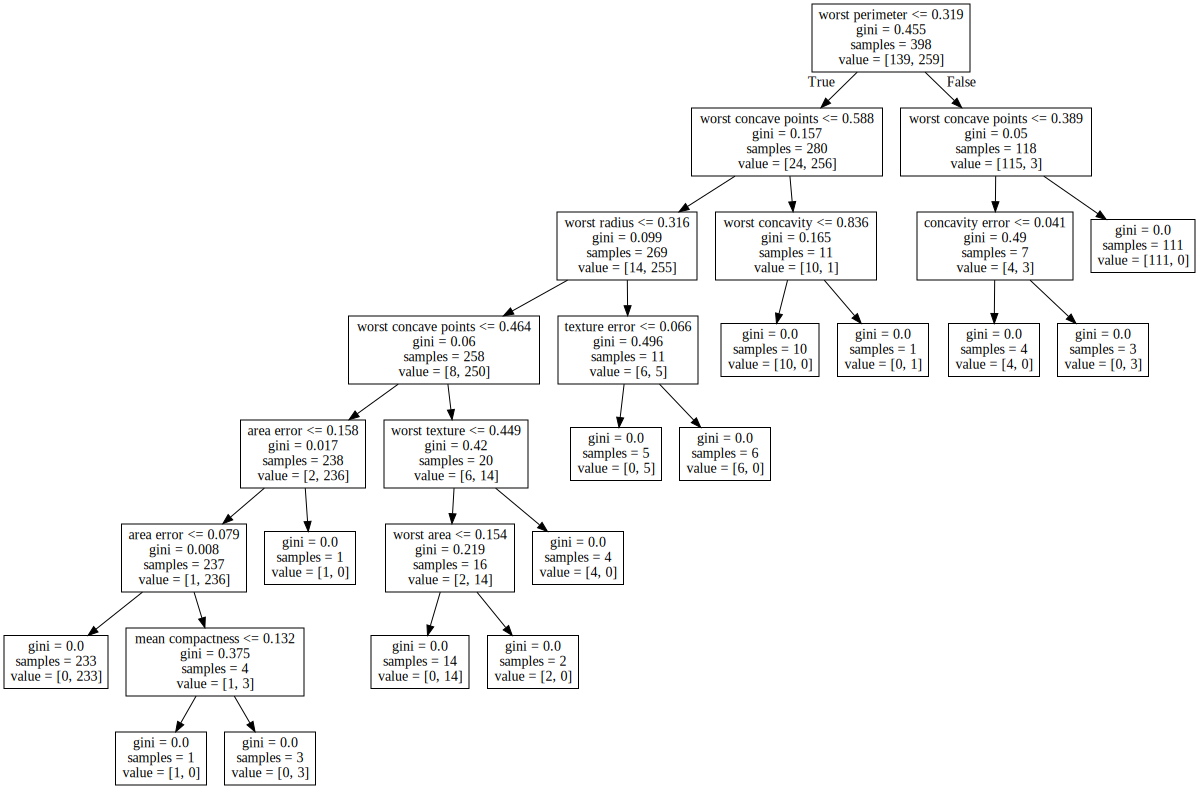

In [58]:
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(model, out_file=None, feature_names = xt.columns))
SVG(graph.pipe(format='svg'))

### 5.3.2 Decision Tree subsample

In this case, the gini metrics are all equal to zero in the final leafs, so the model fitted the data exacly again. In this case, the subsample actually allowed for an improvement in the perfomance measures, although they are still lower that the ones obtained in the previos two methods

Model Report
Accuracy:  0.9415
Precision:  0.9314
Recall:  0.9694
f1:  0.95


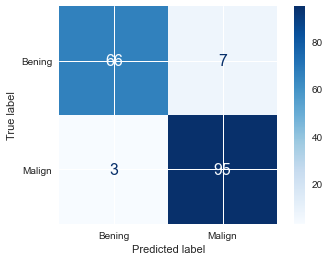

In [59]:
model = DecisionTreeClassifier(random_state=235, max_depth=10)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

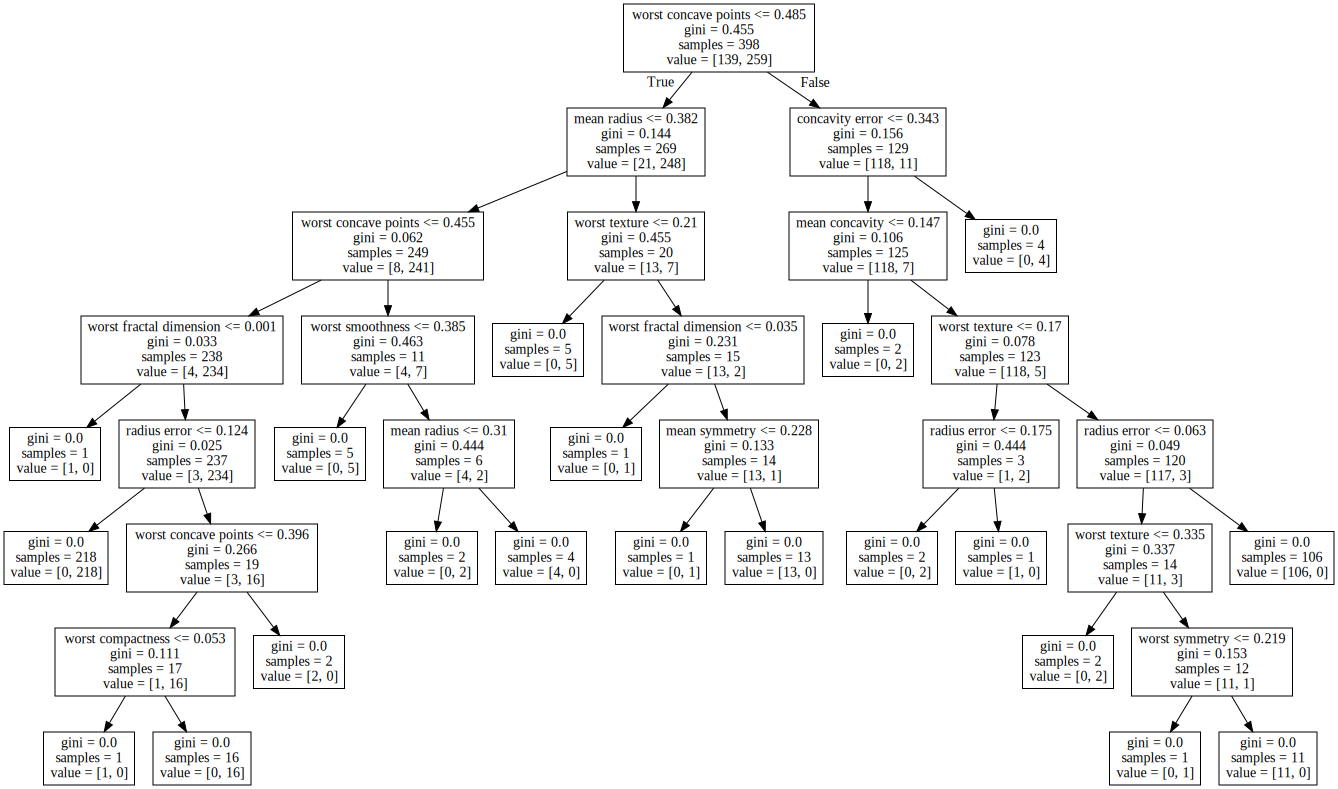

In [60]:
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(model, out_file=None, feature_names = xt.columns))
SVG(graph.pipe(format='svg'))

## 5.4 Support Vector Machines

In [61]:
from sklearn.svm import SVC

### 5.4.1 Support Vector Machines full sample

We will fit the model using a linear, radial basis and polynomial kernels (mapping methods)

Model Report
Accuracy:  0.9591
Precision:  0.9596
Recall:  0.9694
f1:  0.9645


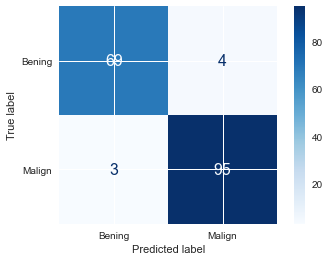

In [63]:
model = SVC(kernel = 'linear', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9708
Precision:  0.9604
Recall:  0.9898
f1:  0.9749


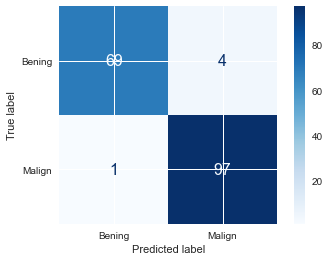

In [64]:
model = SVC(kernel = 'rbf', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9591
Precision:  0.9505
Recall:  0.9796
f1:  0.9648


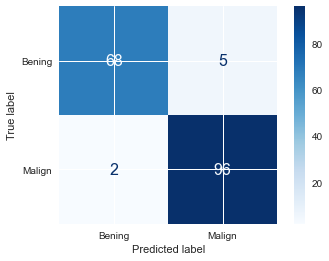

In [65]:
model = SVC(kernel = 'poly', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

The radial basis kernel yields the best metrics. Let us explore what happens when we dropped the selected variables

### 5.4.2 Support Vector Machines subsample

Model Report
Accuracy:  0.9474
Precision:  0.9406
Recall:  0.9694
f1:  0.9548


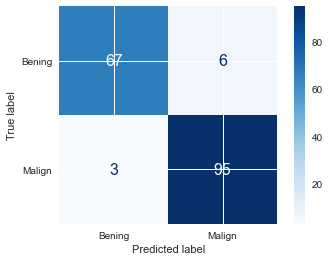

In [66]:
model = SVC(kernel = 'linear', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9649
Precision:  0.96
Recall:  0.9796
f1:  0.9697


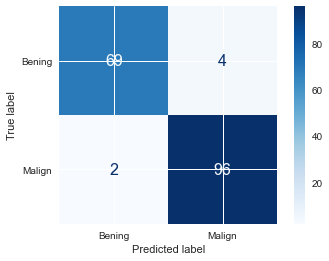

In [67]:
model = SVC(kernel = 'rbf', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.924
Precision:  0.9208
Recall:  0.949
f1:  0.9347


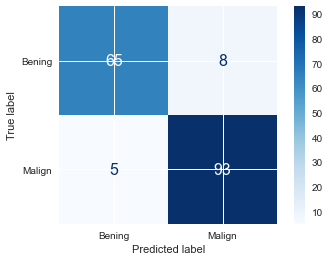

In [68]:
model = SVC(kernel = 'poly', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

We obtained the same results, the radial basis kernel yields the best result. Also, the analysis is consistent with the logistic and the K-neares neighvor methods, as dropping the selected variables actually worsen the performance

# 6.- Identify the best method

For selecting the best method, we compily in one talbe the performance metrics for the best case in each method. The best method was the K-Nearest Neighbor with the Manhattan method and K=3 (full sample). The next better ones were the Logistic Regression and the Support Vector Machines with very little difference between them (full sample). Is interesting to see that the worst method was the one that actually performed better with the subsample. 

In [71]:
L = {'Logistic Regression':[0.9532,0.9245, 1.000, 0.9608], 'KNN':[0.9825,0.9703, 1.0000, 0.9849], 'Decision Tree':[0.9240,0.9126, 0.9592, 0.9353], 'SVM':[0.9708,0.9604, 0.9898, 0.9749]}

df_results = pd.DataFrame(L, index=['Accuracy', 'Precision', 'Recall', 'F1'])

df_results

,Logistic Regression,KNN,Decision Tree,SVM
Accuracy,0.9532,0.9825,0.9240,0.9708
Precision,0.9245,0.9703,0.9126,0.9604
Recall,1.0000,1.0000,0.9592,0.9898
F1,0.9608,0.9849,0.9353,0.9749


# 7.- Variable significance analysis

We will perform the next analysis with the best model from the table above. We will remove one variable at a time and see how the performance measure of the model changes

In [72]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
def train_2(model, x, y, name='Feature'):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=999)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    stats = [np.around(accuracy_score(y_test, y_pred),4),np.around(precision_score(y_test, y_pred),4),
        np.around(recall_score(y_test, y_pred),4), np.around(f1_score(y_test, y_pred),4)]
    results[name] = stats

In [74]:
K=3
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
i = 0
for i in range(0, len(data.feature_names)):
    train_2(model, xt.drop(data.feature_names[i],axis=1), y, name = data.feature_names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

,mean texture,worst texture,concave points error,mean radius,worst concavity,worst compactness,worst perimeter,worst radius,concavity error,compactness error,...,fractal dimension error,mean concave points,mean symmetry,mean smoothness,worst area,worst smoothness,mean fractal dimension,worst concave points,symmetry error,mean compactness
Accuracy,0.9708,0.9708,0.9708,0.9766,0.9766,0.9766,0.9766,0.9766,0.9766,0.9766,...,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825
Precision,0.9604,0.9697,0.9604,0.9700,0.9608,0.9608,0.9700,0.9700,0.9608,0.9700,...,0.9703,0.9703,0.9703,0.9703,0.9703,0.9703,0.9703,0.9703,0.9703,0.9703
Recall,0.9898,0.9796,0.9898,0.9898,1.0000,1.0000,0.9898,0.9898,1.0000,0.9898,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
F1,0.9749,0.9746,0.9749,0.9798,0.9800,0.9800,0.9798,0.9798,0.9800,0.9798,...,0.9849,0.9849,0.9849,0.9849,0.9849,0.9849,0.9849,0.9849,0.9849,0.9849


The less significant measures are "mean symmetry", "worst area", "mean concave points", "fractal dimension error", "mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension" and "worst smoothness" as the performance measures are the highest when removing them. The name of the column in the table above indictes which feature has been removed. We will fit the model again now removing those variables

In [75]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

,worst texture,worst symmetry,worst fractal dimension,mean texture,mean concavity,radius error,perimeter error,concave points error,compactness error,worst concavity,worst compactness,smoothness error,concavity error,area error,worst radius,texture error,mean area,mean perimeter,mean radius,worst perimeter
Accuracy,0.9591,0.9649,0.9708,0.9708,0.9708,0.9708,0.9708,0.9708,0.9708,0.9766,0.9766,0.9766,0.9766,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9883
Precision,0.9596,0.9792,0.9794,0.9794,0.9697,0.9697,0.9697,0.9794,0.9794,0.9796,0.9796,0.9796,0.9796,0.9798,0.9703,0.9798,0.9703,0.9703,0.9703,0.9800
Recall,0.9694,0.9592,0.9694,0.9694,0.9796,0.9796,0.9796,0.9694,0.9694,0.9796,0.9796,0.9796,0.9796,0.9898,1.0000,0.9898,1.0000,1.0000,1.0000,1.0000
F1,0.9645,0.9691,0.9744,0.9744,0.9746,0.9746,0.9746,0.9744,0.9744,0.9796,0.9796,0.9796,0.9796,0.9848,0.9849,0.9848,0.9849,0.9849,0.9849,0.9899


Is interesting how if we remove "Worst Perimeter", we get a better performance measures that without removing any variable

In [76]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness","worst perimeter"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

,worst texture,worst symmetry,mean texture,worst fractal dimension,worst compactness,worst concavity,mean concavity,radius error,perimeter error,area error,compactness error,concavity error,worst radius,mean radius,texture error,mean area,mean perimeter,concave points error,smoothness error
Accuracy,0.9649,0.9649,0.9708,0.9766,0.9766,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9825,0.9883,0.9883,0.9883,0.9883,0.9883,0.9883,0.9883
Precision,0.9600,0.9694,0.9794,0.9796,0.9796,0.9703,0.9798,0.9703,0.9703,0.9703,0.9798,0.9798,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800
Recall,0.9796,0.9694,0.9694,0.9796,0.9796,1.0000,0.9898,1.0000,1.0000,1.0000,0.9898,0.9898,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
F1,0.9697,0.9694,0.9744,0.9796,0.9796,0.9849,0.9848,0.9849,0.9849,0.9849,0.9848,0.9848,0.9899,0.9899,0.9899,0.9899,0.9899,0.9899,0.9899


 Finally, we will repeat the analysis by removing the variables we selected from the correlation analysis

In [77]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=3
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

,mean radius,worst smoothness,mean smoothness,mean symmetry,worst texture,worst concavity,worst concave points,mean compactness,mean concavity,compactness error,worst symmetry,worst fractal dimension,radius error,concavity error,concave points error,worst compactness
Accuracy,0.9474,0.9474,0.9532,0.9532,0.9532,0.9532,0.9532,0.9591,0.9591,0.9591,0.9591,0.9591,0.9649,0.9649,0.9649,0.9649
Precision,0.9320,0.9238,0.9327,0.9327,0.9412,0.9327,0.9327,0.9417,0.9417,0.9417,0.9417,0.9417,0.9510,0.9510,0.9510,0.9510
Recall,0.9796,0.9898,0.9898,0.9898,0.9796,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898,0.9898
F1,0.9552,0.9557,0.9604,0.9604,0.9600,0.9604,0.9604,0.9652,0.9652,0.9652,0.9652,0.9652,0.9700,0.9700,0.9700,0.9700


The results are better when we remove the variables selected in the last feature selection analysis

Model Report
Accuracy:  0.9883
Precision:  0.98
Recall:  1.0
f1:  0.9899


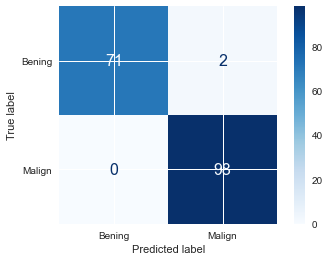

In [78]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness","worst perimeter"],axis=1)
train(model, xt, y)

# 8.- Conclusion

Even though, all classifiers methods actually performed very well, the K-Nearest Neighbor seems to be the most effective. Nevertheless, given thi high number of variables, the model may have been overfitted. We discard this possibility as we removed several features at a time and the explanatory power remained quite high as reflected by the performance measures yielded when fitting the model on the subsample data. We can conclude that some features, when highly correlated to other variables, do not add much to our classifiers methods, so the most efficient choice is to delete them. Finally, given the performance measures obtained we could rely without doubt into our classifiers to do predicitons regarding the Breast Cancer. A larger sampel would be helpful to have more solid basis. 